# WINE DATASET

__1. IMPORT DATA__

In [1]:
# Load the data set
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
%matplotlib inline
data_wine = load_wine()

In [2]:
print("XData:",data_wine.data.shape)
print("YData:",data_wine.target.shape)

XData: (178, 13)
YData: (178,)


In [3]:
wines = np.append(data_wine.data, data_wine.target[:,None], axis=1)
wine_df = pd.DataFrame(wines, columns=data_wine['feature_names']+['target'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
# More information about the data
print(data_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

__2. SPLIT DATA RANDOMLY INTO TRAINING AND TEST SET__

In [5]:
#Split the data set into training and test set randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_wine.data, data_wine.target, random_state=203)

In [6]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (133, 13)
X_test: (45, 13)
y_train: (133,)
y_test: (45,)


__3. SUPPORT VECTOR MACHINE MODEL WITHOUT NORMALIZATION__

In [7]:
#Perform SVM using cross-validation on the training set. 
#Use the default parameters of C=1.0 and gamma=1/n_features
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#train a SVC
svm = SVC()
#perform cross-validation
scores = cross_val_score(svm, X_train, y_train, cv=5)
#compute mean cross-validation accuracy
score = np.mean(scores)
svm.fit(X_train, y_train)
test_score = svm.score(X_test, y_test)

In [8]:
#Accuracy of SVM on the training set
print("SVM generalization accuracy:", round(score,4))

#Find test error rate of the SVM using default parameters
print("Test error rate (default parameters):", round(1-test_score, 4))

SVM generalization accuracy: 0.6695
Test error rate (default parameters): 0.3556


__4. SUPPORT VECTOR MACHINE WITH DATA NORMALIZATION__

In [9]:
#Apply pipeline to normalize the data and perform CV . 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [10]:
#Test Scores for each standarize methods
param_grid = {"svc__C": [0.01, 0.1, 1, 10, 100], "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
norm = [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler()]
y = []
CV_y = []
for i in norm:
    pipe = make_pipeline(i, SVC())
    grid = GridSearchCV(pipe, param_grid=param_grid, cv =5)
    grid.fit(X_train, y_train)
    score = grid.score(X_test, y_test)
    y.append(score)
    CV_y.append(grid.best_score_)
    print(f"\n__For {i}:")
    print("Best cross-validation accuracy:", round(grid.best_score_,4))
    print("Best parameters:", grid.best_params_)
    print("Test score:", round(score,4))


__For MinMaxScaler(copy=True, feature_range=(0, 1)):
Best cross-validation accuracy: 0.9852
Best parameters: {'svc__C': 1, 'svc__gamma': 0.1}
Test score: 0.9778

__For Normalizer(copy=True, norm='l2'):
Best cross-validation accuracy: 0.9407
Best parameters: {'svc__C': 100, 'svc__gamma': 100}
Test score: 1.0

__For StandardScaler(copy=True, with_mean=True, with_std=True):
Best cross-validation accuracy: 0.9701
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}
Test score: 0.9556

__For RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True):
Best cross-validation accuracy: 0.9849
Best parameters: {'svc__C': 10, 'svc__gamma': 0.001}
Test score: 0.9556


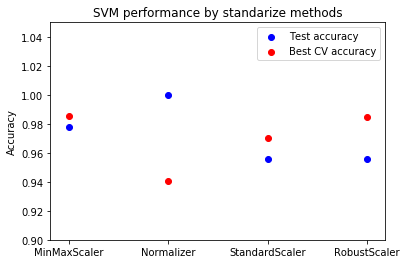

In [11]:
# Plot the results for SVM
x_name = ['MinMaxScaler', 'Normalizer', 'StandardScaler', 'RobustScaler']
plt.scatter(x_name, y, color='blue')
plt.scatter(x_name,CV_y, color='red')
plt.title('SVM performance by standarize methods')
plt.ylabel('Accuracy')
plt.legend(['Test accuracy', 'Best CV accuracy'])
plt.ylim([0.9,1.05])
plt.show()

__5. MULTI-LAYER PERCEPTRON CLASSIFIER__

In [12]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
# Get generalization accuracy
scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("Generalization accuracy for mlp:", round(np.mean(scores),4))

Generalization accuracy for mlp: 0.6168


In [14]:
#Test set score
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
print("Test score for mlp:", round(np.mean(y_test == pred),4))

Test score for mlp: 0.6667


In [15]:
# MLP using different standarize methods
param_grid = {"mlpclassifier__alpha": [0.01, 0.1, 1, 10, 100], "mlpclassifier__beta_1": [0.009, 0.09, 0.9]}
y = []
CV_y = []
for i in norm:
    pipe2 = make_pipeline(i, MLPClassifier())
    grid2 = GridSearchCV(pipe2, param_grid=param_grid, cv =5)
    grid2.fit(X_train, y_train)
    y.append(grid2.score(X_test, y_test))
    CV_y.append(grid2.best_score_)
    print(f'\n__For {i}:')
    print("Best cross-validation accuracy:", round(grid2.best_score_,4))
    print("Best parameters:", grid2.best_params_)
    print("Test score:", round(grid2.score(X_test, y_test),4))


__For MinMaxScaler(copy=True, feature_range=(0, 1)):
Best cross-validation accuracy: 0.9852
Best parameters: {'mlpclassifier__alpha': 10, 'mlpclassifier__beta_1': 0.009}
Test score: 0.9778

__For Normalizer(copy=True, norm='l2'):
Best cross-validation accuracy: 0.6695
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.9}
Test score: 0.6889

__For StandardScaler(copy=True, with_mean=True, with_std=True):
Best cross-validation accuracy: 0.9701
Best parameters: {'mlpclassifier__alpha': 0.01, 'mlpclassifier__beta_1': 0.09}
Test score: 0.9333

__For RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True):
Best cross-validation accuracy: 0.9701
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.009}
Test score: 0.9778


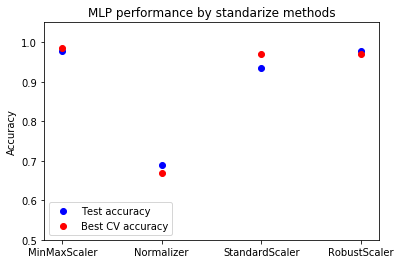

In [16]:
# Plot the results for MLP
plt.scatter(x_name, y, color='blue')
plt.scatter(x_name,CV_y, color='red')
plt.title('MLP performance by standarize methods')
plt.ylabel('Accuracy')
plt.legend(['Test accuracy', 'Best CV accuracy'])
plt.ylim([0.5,1.05])
plt.show()

# HANDWRITTEN DIGITS DATASET

__1. IMPORT DATA__

In [17]:
#Load the USPS datasets (train and test) and inspect its format
train = np.genfromtxt("zip.train")
test = np.genfromtxt("zip.test")
print("Original train:",train.shape)
print("Original test:",test.shape)

Original train: (7291, 257)
Original test: (2007, 257)


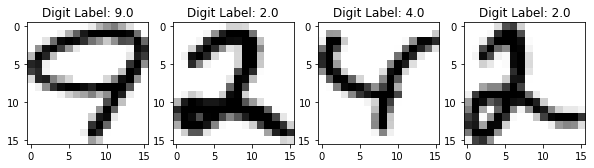

In [18]:
# Plot four random samples
import random
plt.figure(figsize= (10,5))
idx = list(range(len(train)))
list_idx = random.sample(idx,4)
for i in range(len(list_idx)):
    train[list_idx[i],1:]
    x  = np.reshape(train[list_idx[i],1:], (16,16))
    plt.subplot(1,4,i+1)
    plt.imshow(x, cmap='gray_r')
    plt.title('Digit Label: {}'.format(train[list_idx[i],0]))
plt.show()

In [19]:
#Join both datasets into one
data = np.concatenate((train,test),axis=0)
print("Original data shape:",data.shape)

Original data shape: (9298, 257)


__2. SPLIT DATA RANDOMLY INTO TRAINING AND TEST SET__

In [20]:
#Split the data set into training and test set randomly
X_train, X_test, y_train, y_test = train_test_split(data[:,1:], data[:,0], random_state=203)

In [21]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (6973, 256)
X_test: (2325, 256)
y_train: (6973,)
y_test: (2325,)


__3. SUPPORT VECTOR MACHINE MODEL WITHOUT NORMALIZATION__

In [22]:
#Perform SVM using cross-validation on the training set. 
#Use the default parameters of C=1.0 and gamma=1/n_features

#train a SVC
svm = SVC()
#perform cross-validation
scores = cross_val_score(svm, X_train, y_train, cv=5)
#compute mean cross-validation accuracy
score = np.mean(scores)
svm.fit(X_train, y_train)
test_score = svm.score(X_test, y_test)

In [23]:
#Accuracy of SVM on the training set
print("SVM generalization accuracy:", round(score,4))

#Find test error rate of the SVM using default parameters
print("Test error rate (default parameters):", round(1-test_score,4))

SVM generalization accuracy: 0.9716
Test error rate (default parameters): 0.0292


__4. SUPPORT VECTOR MACHINE WITH DATA NORMALIZATION__

In [24]:
#Test Scores for each standarize methods
from tqdm import tqdm
svm=SVC()
param_grid2 = {"svc__C": [0.01, 0.1, 1], "svc__gamma": [0.01, 0.1, 1]}
norm = [MinMaxScaler(), Normalizer(), StandardScaler(), RobustScaler()]

y = []
CV_y = []
for i in tqdm(norm):
    pipe = make_pipeline(i, SVC())
    grid = GridSearchCV(pipe, param_grid=param_grid2, cv =3, refit = True)
    grid.fit(X_train, y_train)
    pred = grid.predict(X_test)
    y.append(grid.score(X_test, y_test))
    CV_y.append(grid.best_score_)
    print(f'\n__For {i}:')
    print("Best cross-validation accuracy:", round(grid.best_score_,4))
    print("Best parameters:", grid.best_params_)
    print("Test score:", round(grid.score(X_test, y_test),4))

  0%|          | 0/4 [00:00<?, ?it/s]


__For MinMaxScaler(copy=True, feature_range=(0, 1)):
Best cross-validation accuracy: 0.9611
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


 25%|██▌       | 1/4 [06:09<18:27, 369.20s/it]

Test score: 0.957

__For Normalizer(copy=True, norm='l2'):
Best cross-validation accuracy: 0.9667
Best parameters: {'svc__C': 1, 'svc__gamma': 1}


 50%|█████     | 2/4 [11:23<11:45, 352.70s/it]

Test score: 0.9682

__For StandardScaler(copy=True, with_mean=True, with_std=True):
Best cross-validation accuracy: 0.9208
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


 75%|███████▌  | 3/4 [18:57<06:23, 383.02s/it]

Test score: 0.9338

__For RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True):
Best cross-validation accuracy: 0.7242
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


100%|██████████| 4/4 [26:50<00:00, 402.66s/it]

Test score: 0.7884


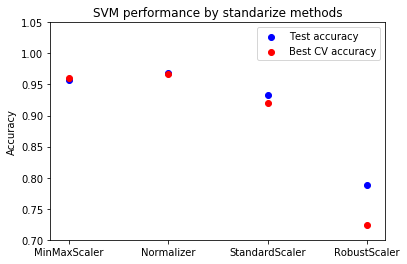

In [25]:
# Plot the results for SVM
plt.scatter(x_name, y, color='blue')
plt.scatter(x_name,CV_y, color='red')
plt.title('SVM performance by standarize methods')
plt.ylabel('Accuracy')
plt.legend(['Test accuracy', 'Best CV accuracy'])
plt.ylim([0.7,1.05])
plt.show()

__5. MULTI-LAYER PERCEPTRON CLASSIFIER__

In [26]:
# Get generalization accuracy
scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("Generalization accuracy for mlp:", round(np.mean(scores),4))

#Test set score
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
print("Test score for mlp:", round(np.mean(y_test == pred),4))

Generalization accuracy for mlp: 0.963
Test score for mlp: 0.9639


In [27]:
#MLP using standarize methods
param_grid = {"mlpclassifier__alpha": [0.1, 1, 10], "mlpclassifier__beta_1": [0.009, 0.09, 0.9]}
y = []
CV_y = []
for i in tqdm(norm):
    pipe2 = make_pipeline(i, MLPClassifier())
    grid2 = GridSearchCV(pipe2, param_grid=param_grid, cv =2)
    grid2.fit(X_train, y_train)
    y.append(grid2.score(X_test, y_test))
    CV_y.append(grid2.best_score_)
    print("Best cross-validation accuracy:", round(grid2.best_score_,4))
    print("Best parameters:", grid2.best_params_)
    print("Test score:", round(grid2.score(X_test, y_test),4))

 25%|██▌       | 1/4 [04:09<12:28, 249.53s/it]

Best cross-validation accuracy: 0.9588
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.9}
Test score: 0.9652


 50%|█████     | 2/4 [08:01<08:08, 244.23s/it]

Best cross-validation accuracy: 0.9478
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.009}
Test score: 0.9531


 75%|███████▌  | 3/4 [12:41<04:14, 254.87s/it]

Best cross-validation accuracy: 0.963
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.9}
Test score: 0.9656


100%|██████████| 4/4 [17:08<00:00, 257.18s/it]

Best cross-validation accuracy: 0.9465
Best parameters: {'mlpclassifier__alpha': 0.1, 'mlpclassifier__beta_1': 0.009}
Test score: 0.9557


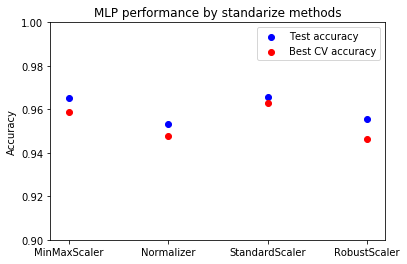

In [28]:
# Plot the results for MLP
plt.scatter(x_name, y, color='blue')
plt.scatter(x_name,CV_y, color='red')
plt.title('MLP performance by standarize methods')
plt.ylabel('Accuracy')
plt.legend(['Test accuracy', 'Best CV accuracy'])
plt.ylim([0.9,1])
plt.show()